# 🚀House Price Predicting using Machine Learning and Deep Learning📈📉

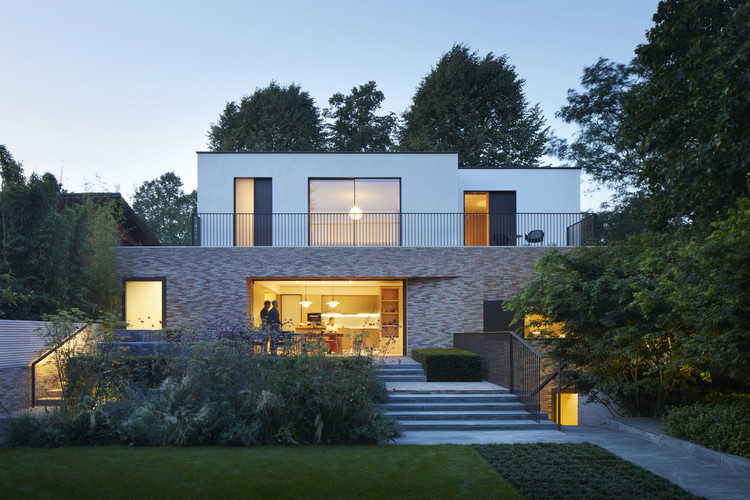

@Credit: SACHIN PATIL<br>
kaggele profile Link:https://www.kaggle.com/sachinpatil1280

# Introduction 💥

I this notebook, we will explore the data from the housing-price-prediction, which is about predicting the house prices using deep learning.
> our goal to create an accurate deep learning model that can estimate the house price for the given data.

We will be using pandas, matplotlib,seaborn,tensorflow, scikit-learn and linear regression.

This <b>RMSE of Deep Learning model</b> is <b> </b>0.079

# Data info

<b> 1. Price:</b> The price of the house.

<b> 2. Area: </b>The total area of the house in square feet.

<b> 3. Bedrooms:</b> The number of bedrooms in the house.

<b> 4. Bathrooms:</b> The number of bathrooms in the house.

<b> 5. Stories:</b> The number of stories in the house.

<b> 6. Mainroad:</b> Whether the house is connected to the main road (Yes/No).

<b> 7. Guestroom:</b> Whether the house has a guest room (Yes/No).

<b> 8. Basement:</b> Whether the house has a basement (Yes/No).

<b> 9. Hot water heating:</b> Whether the house has a hot water heating system (Yes/No).

<b> 10. Airconditioning:</b> Whether the house has an air conditioning system (Yes/No).

<b> 11. Parking:</b> The number of parking spaces available within the house.

<b> 12. Prefarea:</b> Whether the house is located in a preferred area (Yes/No).

<b> 13. Furnishing status:</b> The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).








In [1]:
# Importing necessary libraries

# loading and basic fucn
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# machine learning
from sklearn.linear_model import  LinearRegression

# warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('/content/drive/MyDrive/DEEP LEARNING PROJECTS/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.shape

(545, 13)

In [4]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Exploratory Data Analysis 📊📊

In [8]:
num_cols = data.select_dtypes(exclude='object')
num_cols

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [9]:
cat_cols = data.select_dtypes(include='object')
cat_cols

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


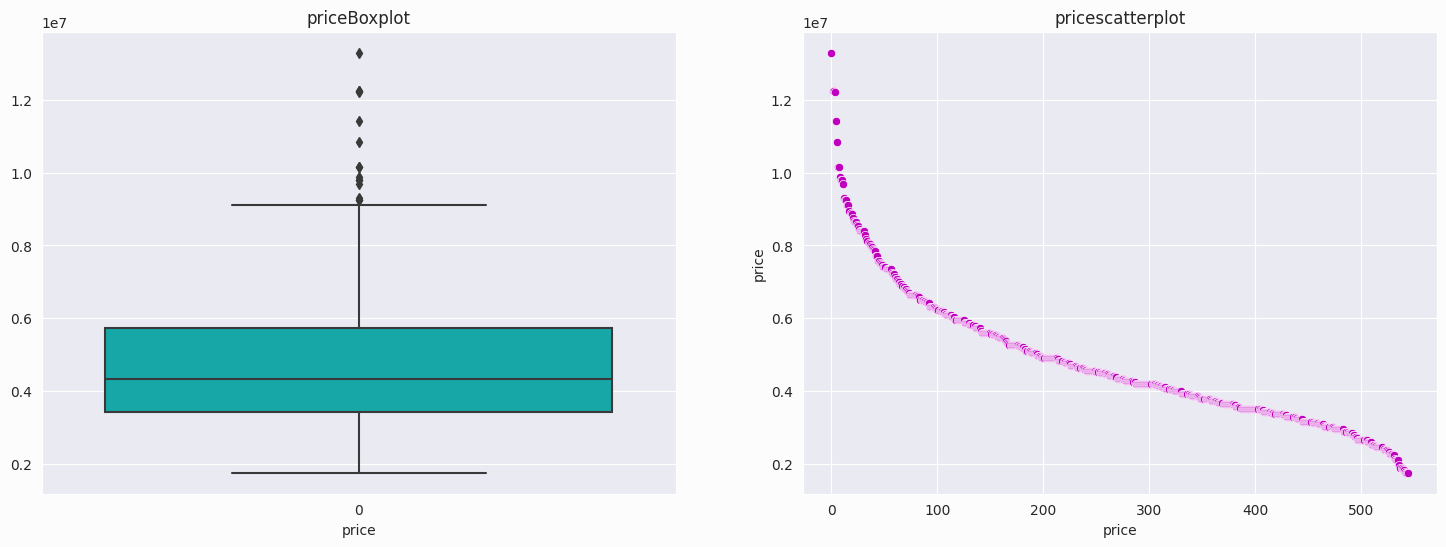

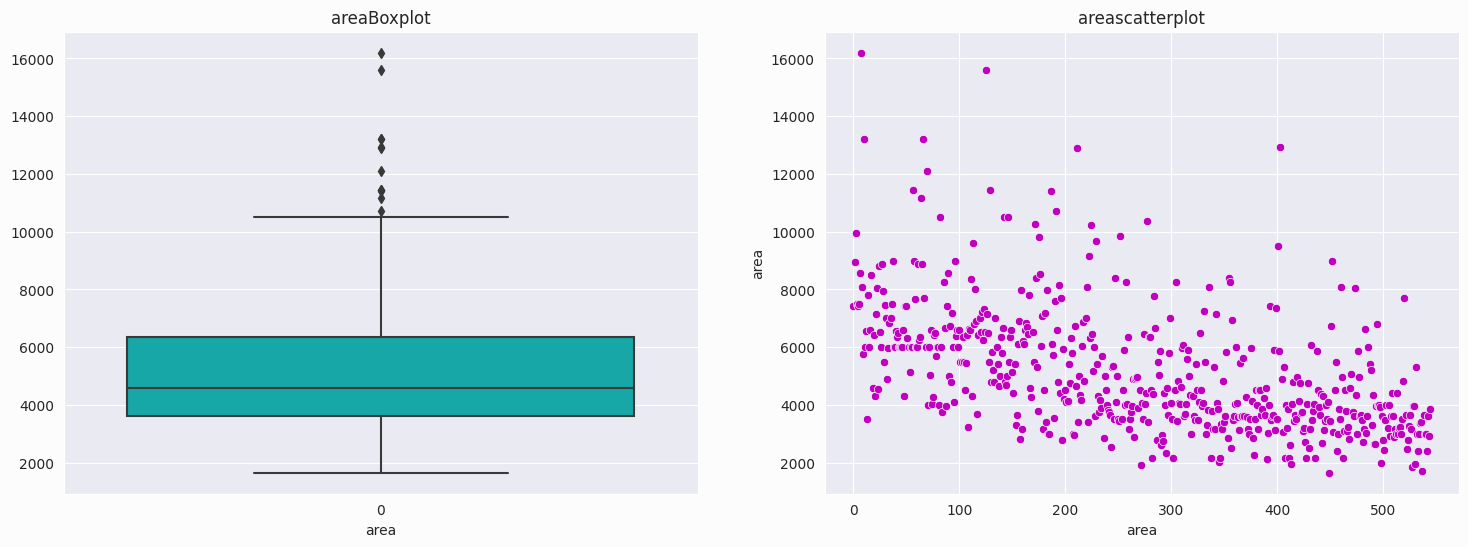

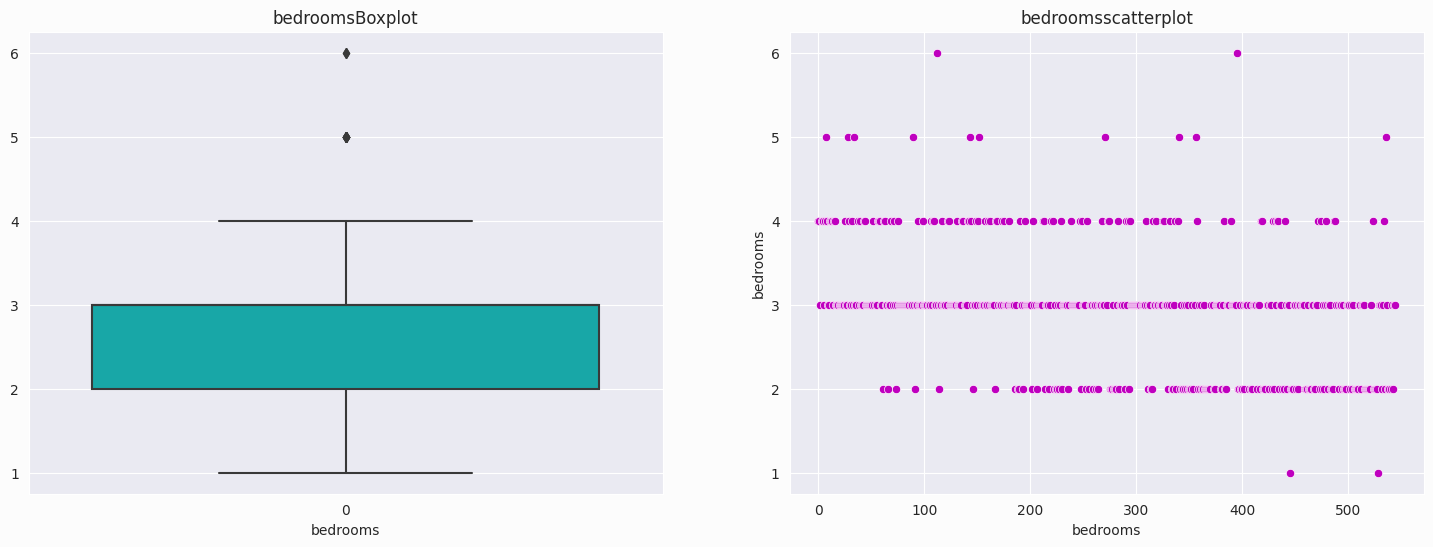

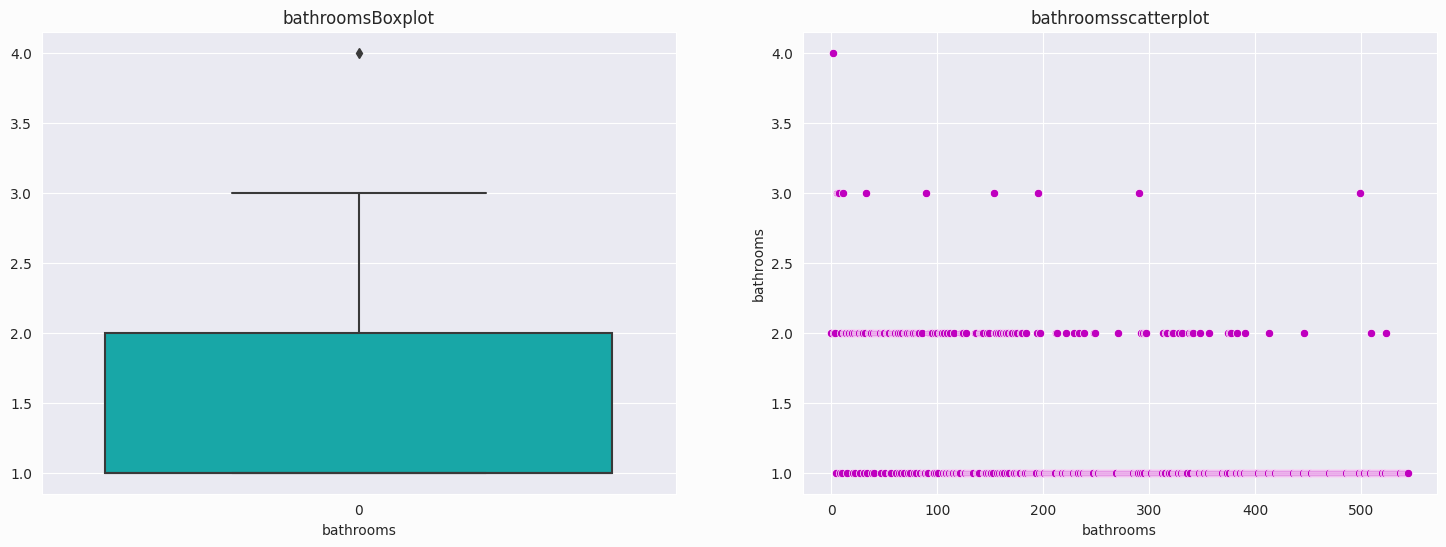

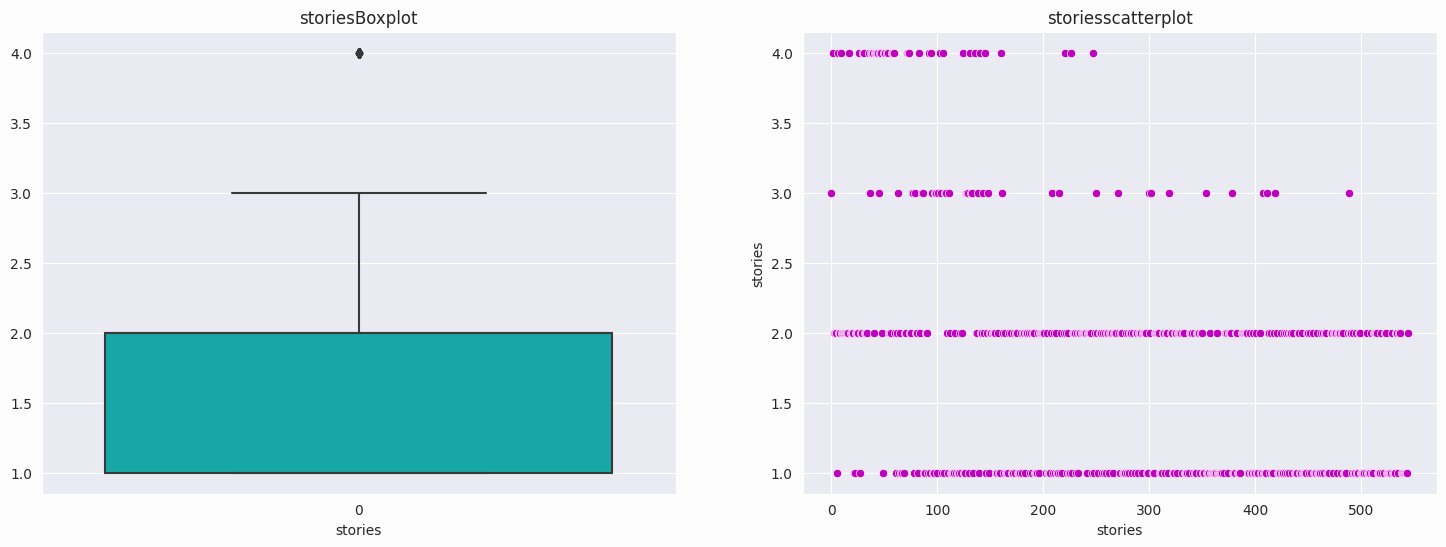

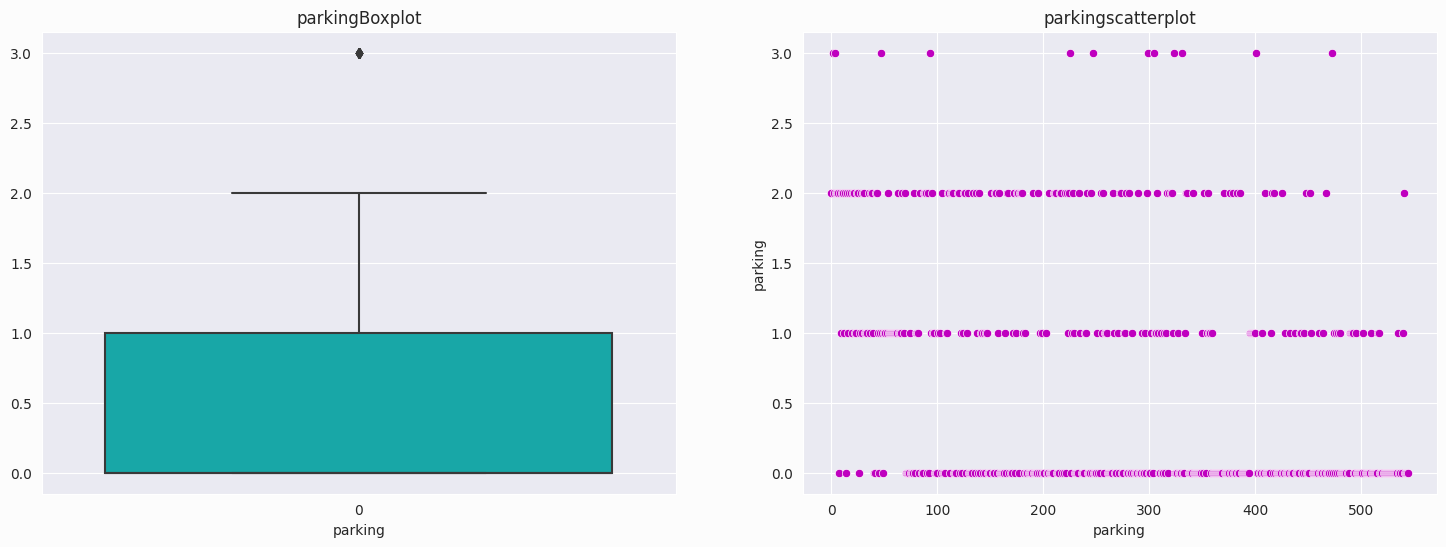

In [10]:
sns.set_style('darkgrid')

for feat in num_cols:
  plt.figure(figsize=(18,6),edgecolor='blue',facecolor='#FCFCFC')
  ax1 = plt.subplot(1,2,1)
  sns.boxplot(data[feat],color='c')
  plt.title(feat + 'Boxplot')
  plt.xlabel(feat,fontsize=10)

  print('\n')

  ax2 = plt.subplot(1,2,2)
  sns.scatterplot(data[feat],color='m')
  plt.title(feat + 'scatterplot')
  plt.xlabel(feat,fontsize=10)

  plt.show()

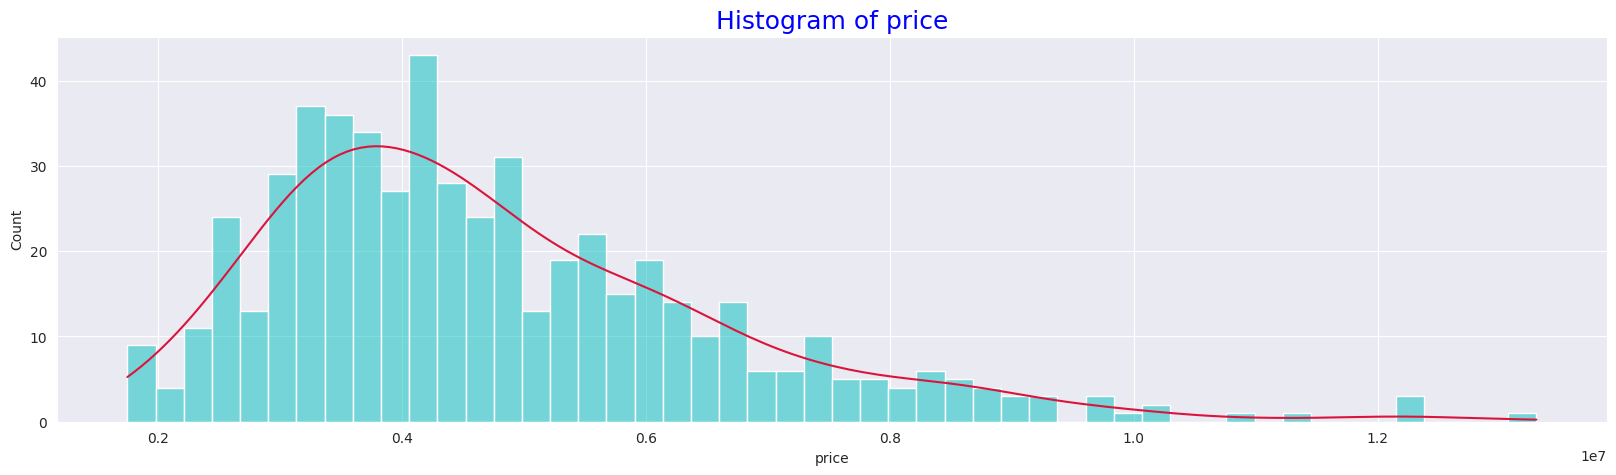

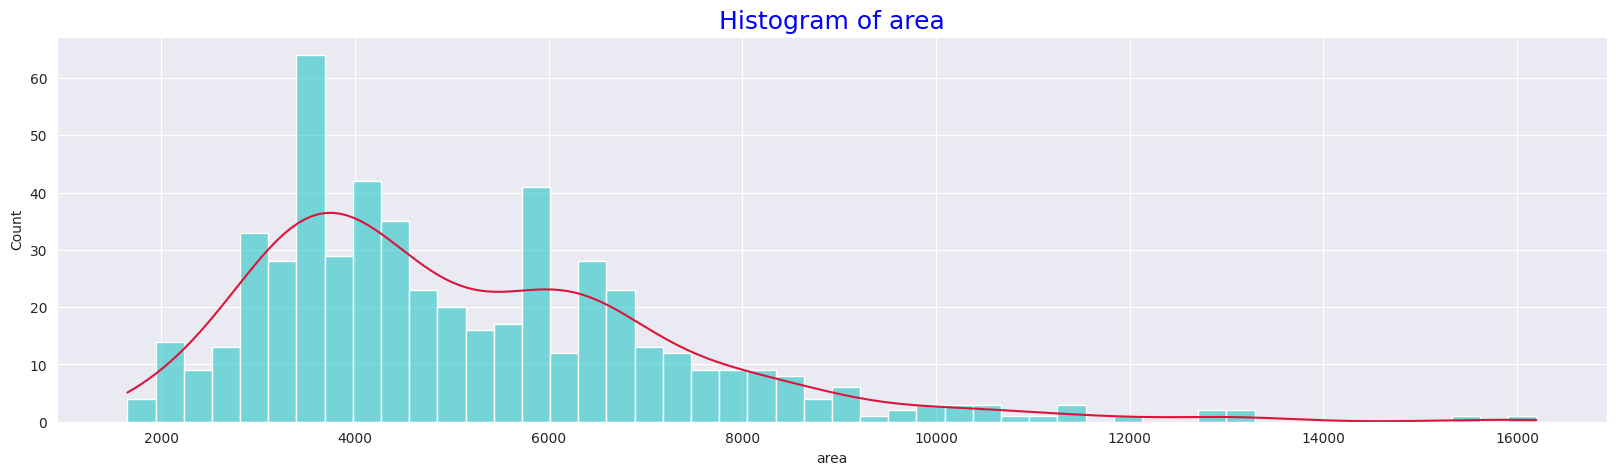

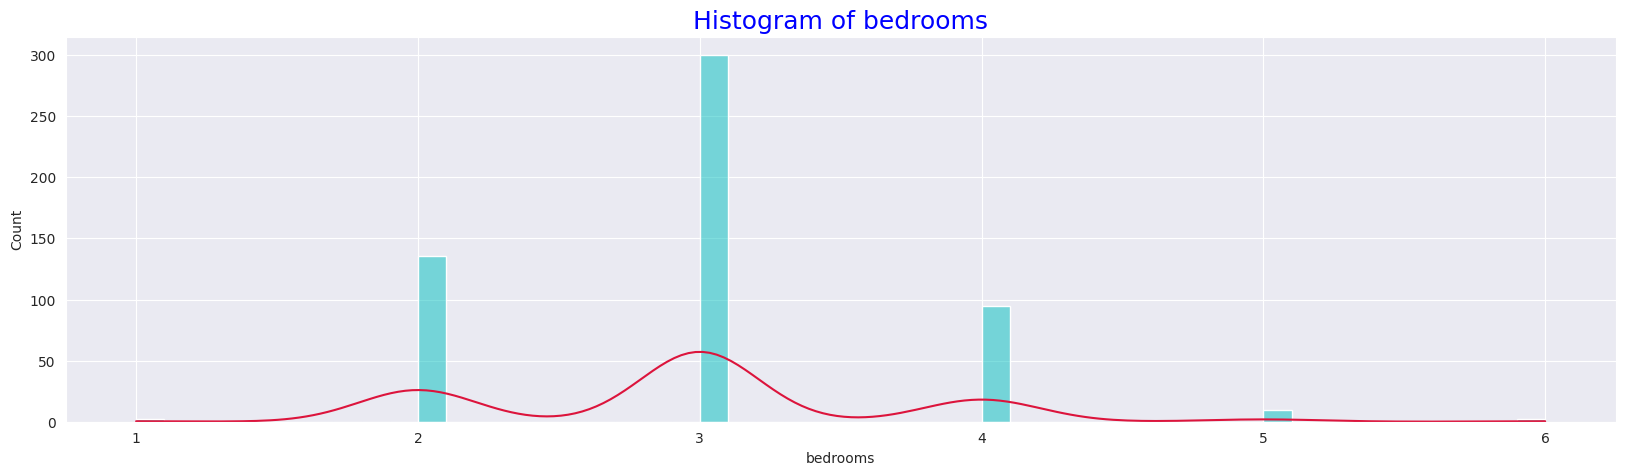

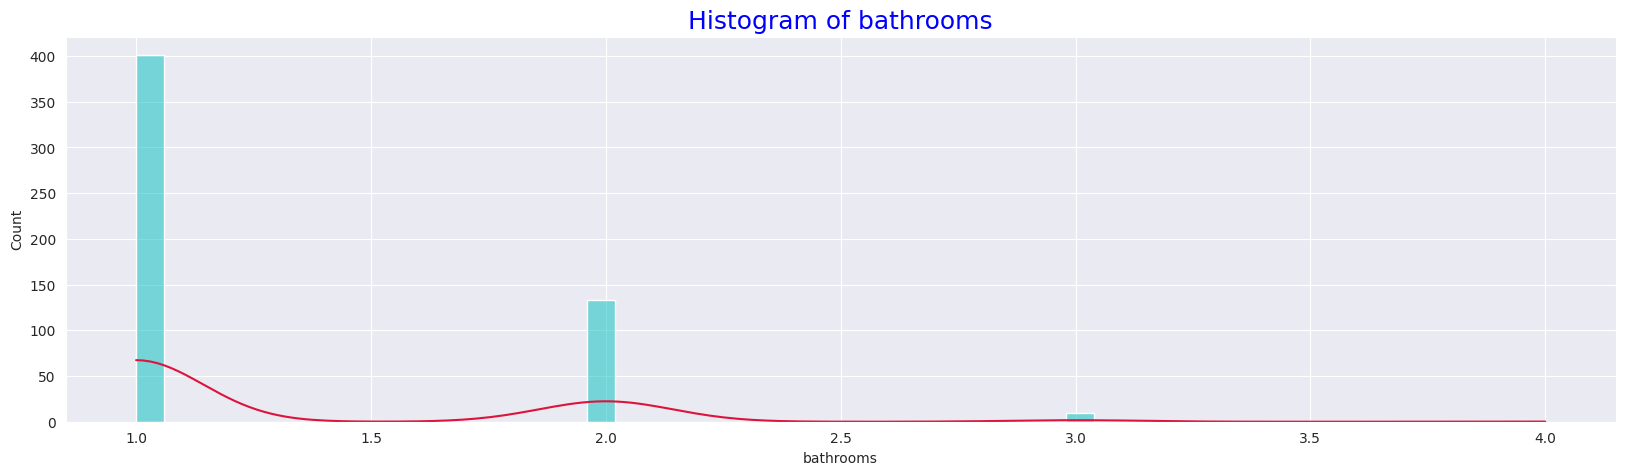

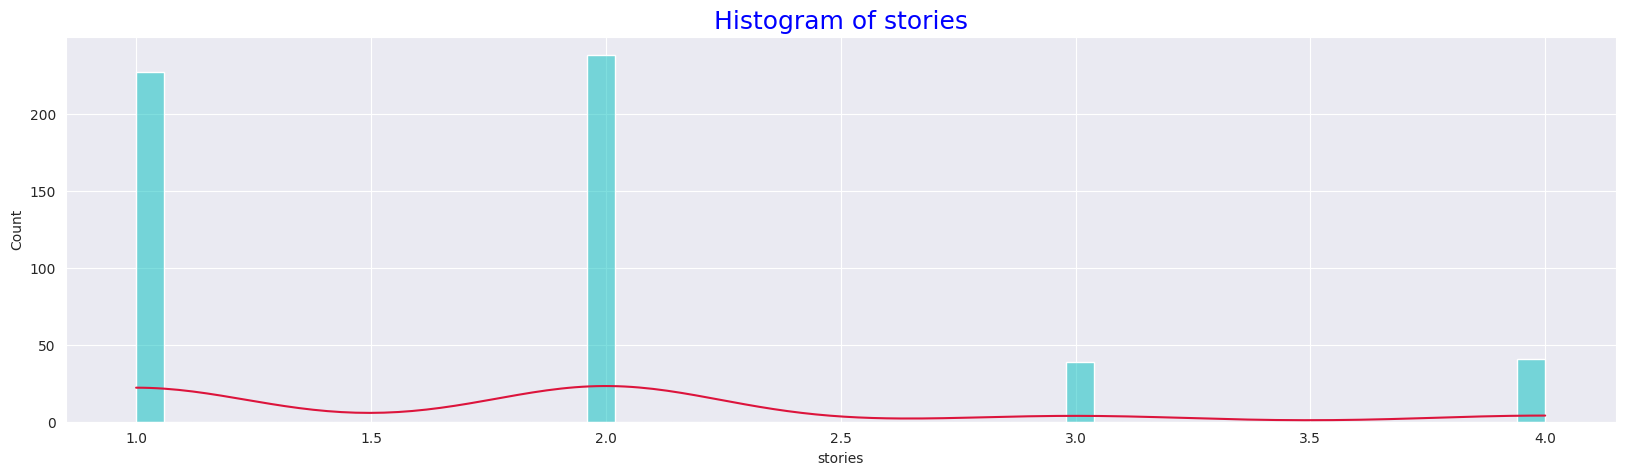

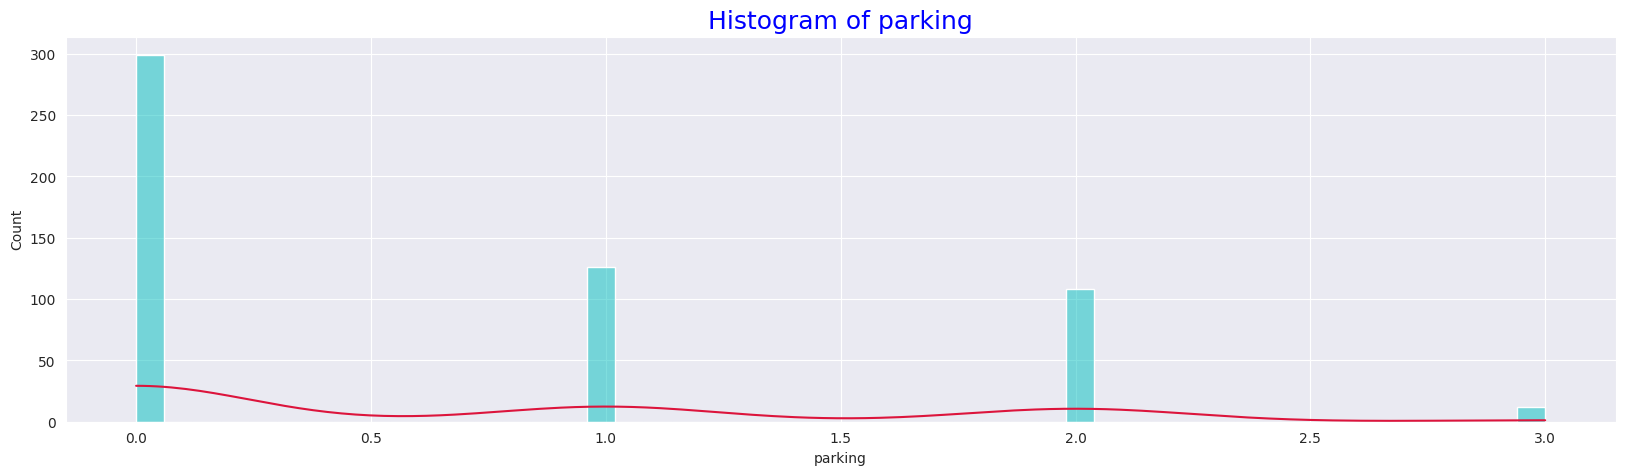

In [11]:
#Plots for numerical columns

for i in num_cols:
  plt.figure(figsize=(20,5))
  ax = sns.histplot(data=data,x=i,bins=50,kde=True,color='c')
  ax.lines[0].set_color('crimson')
  plt.title(f'Histogram of {i}',fontdict={'size':18,'color':'blue'})
  plt.show()

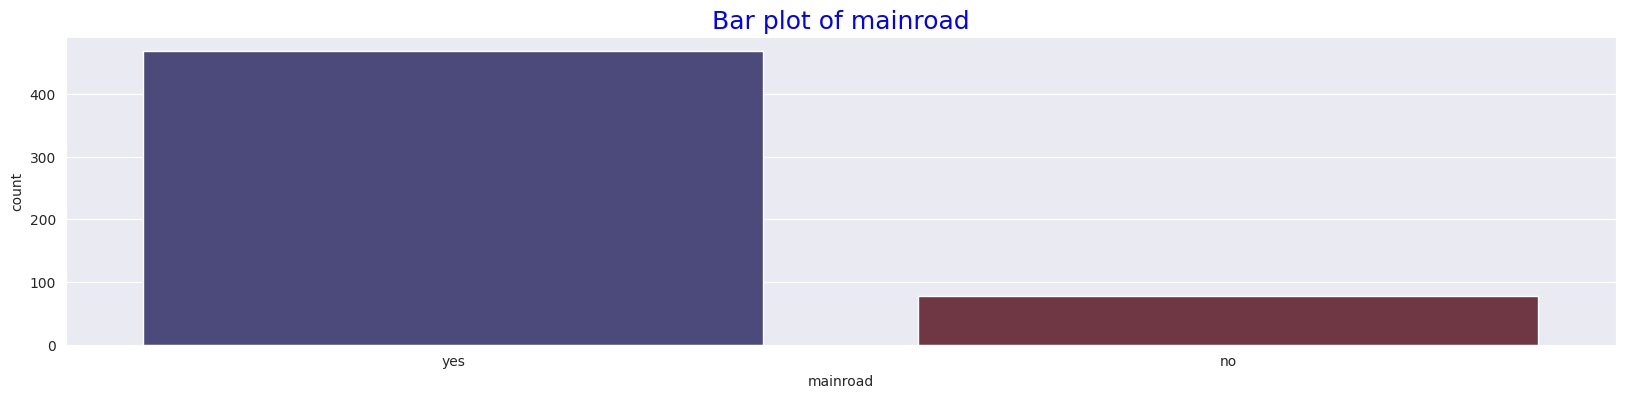

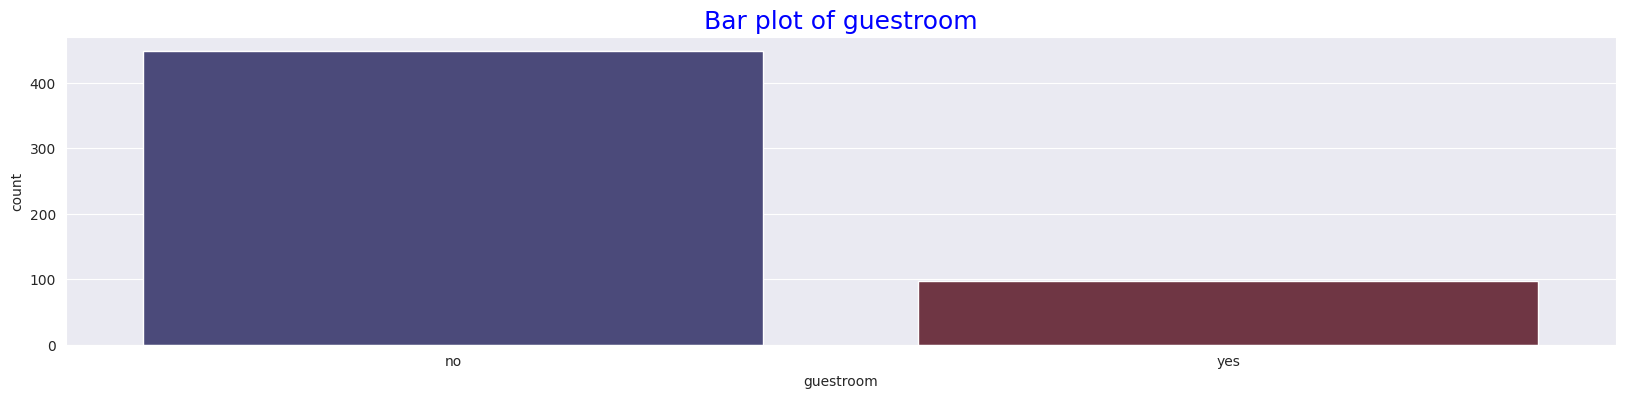

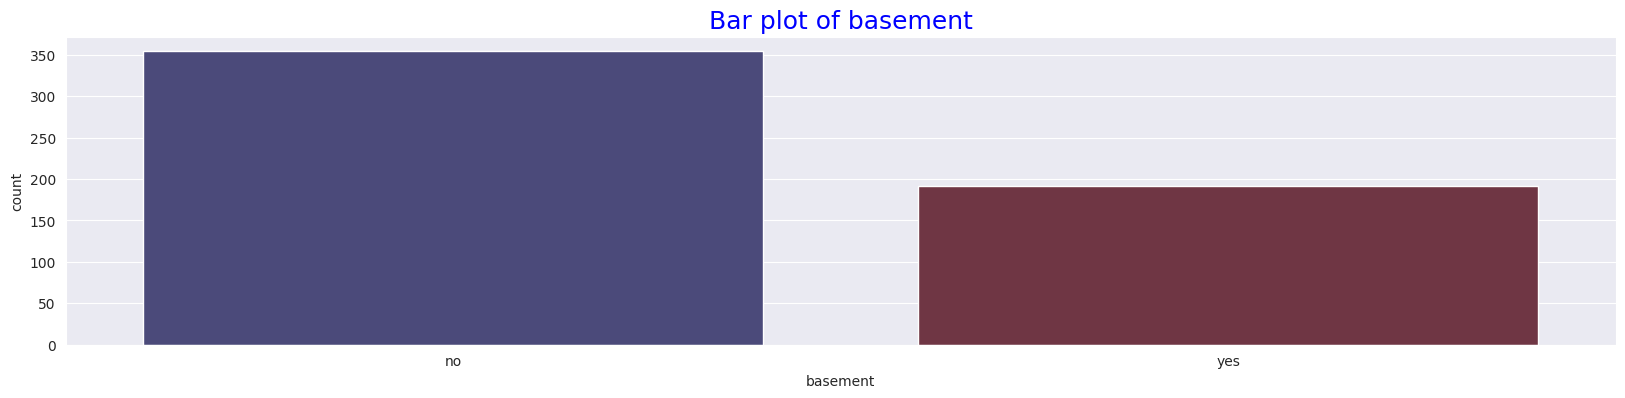

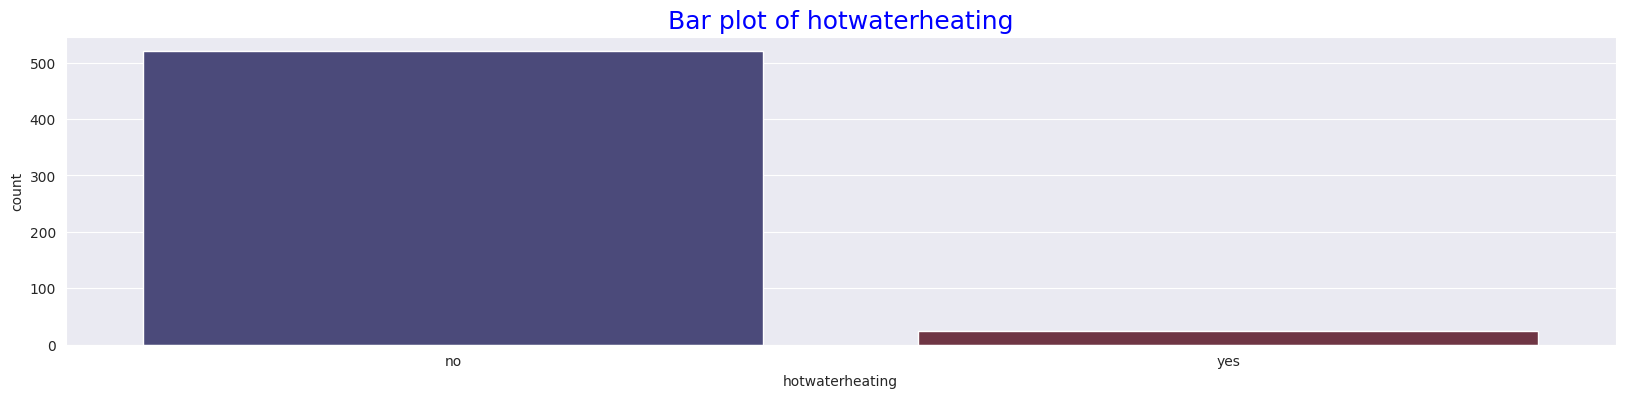

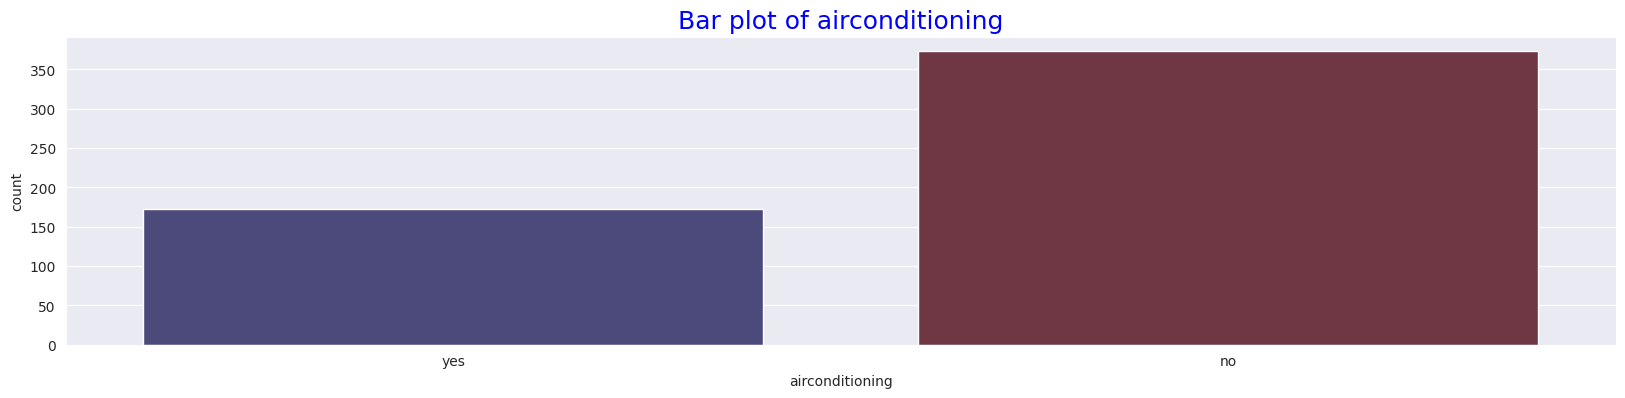

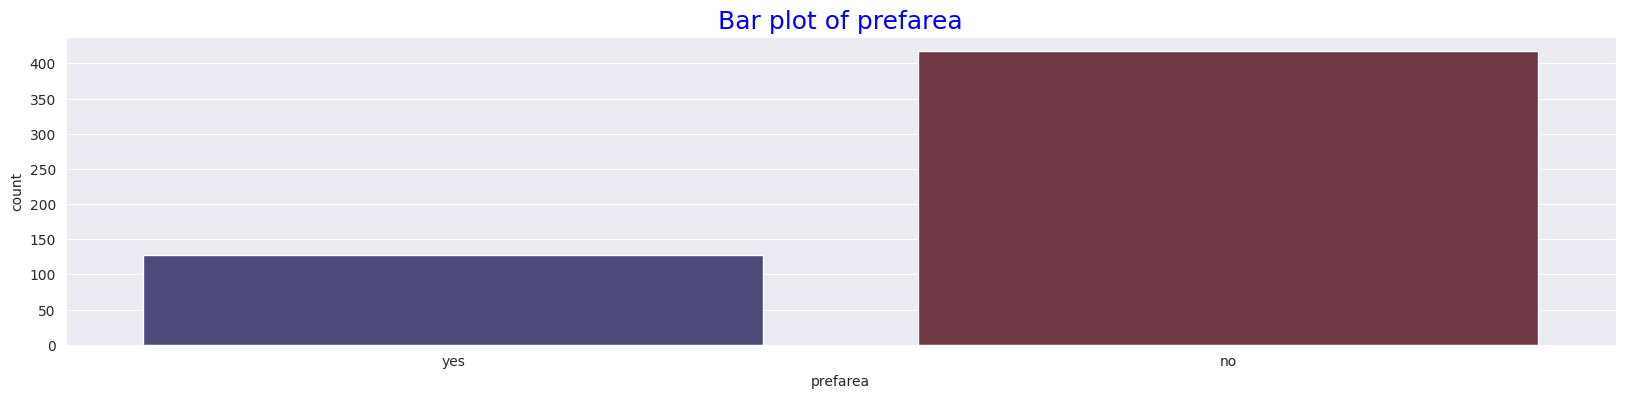

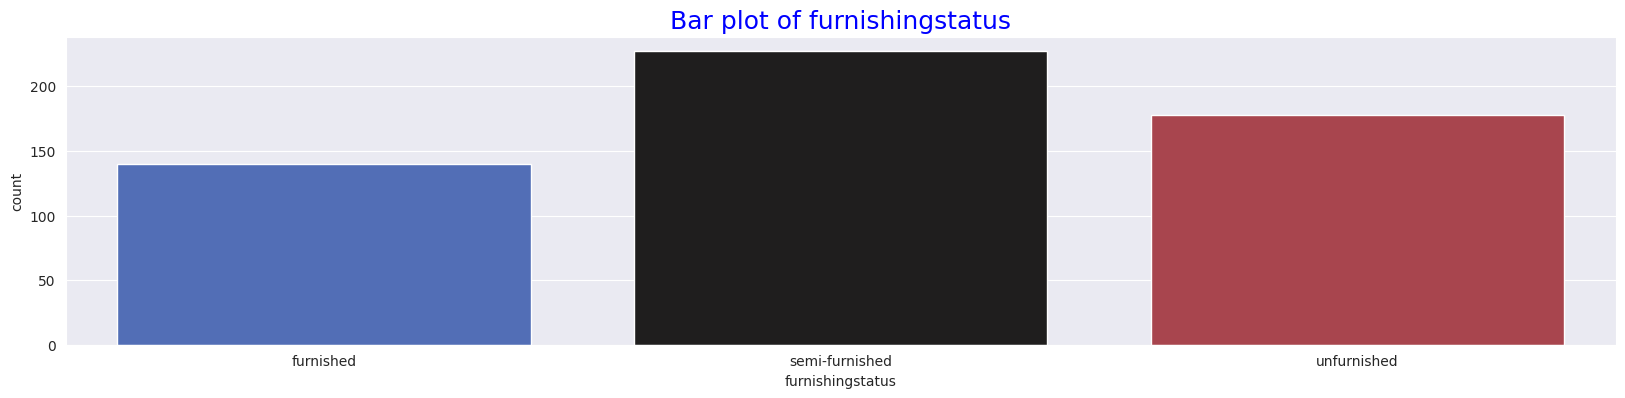

In [12]:
for i in cat_cols:
  plt.figure(figsize=(20,4))
  sns.countplot(data=data,x=i,palette='icefire')
  plt.title(f'Bar plot of {i}',fontdict={'size':18,'color':'Blue'})
  plt.show()

# Feature Engineering 🛠️

# Removing Outliers

In [13]:
data.drop(index=data[data.price > 10000000].index,inplace=True)

In [14]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished


# Feature Scaling

In [15]:
X = data.drop(['price'],axis=1)
y = data['price']/ 10000000  # dividing the pricec for normalization

In [16]:
feature_num = X.select_dtypes(exclude='object').columns
feature_cat = X.select_dtypes(include='object').columns


# preprocessing ⚙️

In [17]:
preprocessor = make_column_transformer((MinMaxScaler(),feature_num),
                                       (OneHotEncoder(handle_unknown='ignore'),feature_cat))

# Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [20]:
X_train.shape

(375, 20)

# Deep learning Model

## model layers

In [21]:
from keras.models import  Sequential
from keras.layers import Dense

# Sequential model
model = Sequential()

#input layer
model.add(Dense(units = 20, activation='relu',input_dim = X_train.shape[1]))

# Hidden layers
model.add(Dense(units=500,activation='relu'))
model.add(Dense(units=500,activation='relu'))
model.add(Dense(units=500,activation='relu'))

# Output layer
model.add(Dense(units=1))

In [22]:
# Compile the model
model.compile(optimizer='adam',loss='mae',metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [23]:
#Early Stopping
early_stopping = keras.callbacks.EarlyStopping(patience=20,
                 min_delta=0.001,
                 restore_best_weights=True,)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 500)               10500     
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 1)                 501       
                                                                 
Total params: 512421 (1.95 MB)
Trainable params: 512421 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
pip install graphviz


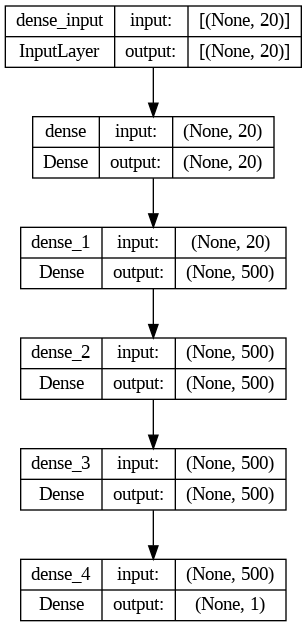

In [26]:
#Visualize the model
from keras.utils import plot_model
plot_model(model,to_file='/content/drive/MyDrive/DEEP LEARNING PROJECTS/model.png',show_shapes=True,show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

# Model Fit

In [27]:
house_price = model.fit(X_train,y_train,
                        validation_data=(X_test,y_test),
                        batch_size=128,
                        epochs=400,
                        callbacks=[early_stopping],verbose=2)

Epoch 1/400
3/3 - 3s - loss: 0.2854 - root_mean_squared_error: 0.3462 - val_loss: 0.2119 - val_root_mean_squared_error: 0.2793 - 3s/epoch - 877ms/step
Epoch 2/400
3/3 - 0s - loss: 0.1798 - root_mean_squared_error: 0.2296 - val_loss: 0.1424 - val_root_mean_squared_error: 0.1884 - 94ms/epoch - 31ms/step
Epoch 3/400
3/3 - 0s - loss: 0.1316 - root_mean_squared_error: 0.1780 - val_loss: 0.1239 - val_root_mean_squared_error: 0.1699 - 90ms/epoch - 30ms/step
Epoch 4/400
3/3 - 0s - loss: 0.1105 - root_mean_squared_error: 0.1451 - val_loss: 0.1189 - val_root_mean_squared_error: 0.1479 - 94ms/epoch - 31ms/step
Epoch 5/400
3/3 - 0s - loss: 0.1003 - root_mean_squared_error: 0.1290 - val_loss: 0.1027 - val_root_mean_squared_error: 0.1424 - 97ms/epoch - 32ms/step
Epoch 6/400
3/3 - 0s - loss: 0.0954 - root_mean_squared_error: 0.1314 - val_loss: 0.0959 - val_root_mean_squared_error: 0.1317 - 92ms/epoch - 31ms/step
Epoch 7/400
3/3 - 0s - loss: 0.0869 - root_mean_squared_error: 0.1173 - val_loss: 0.1027 

# Loss Plot

In [28]:
error = pd.DataFrame(house_price.history)

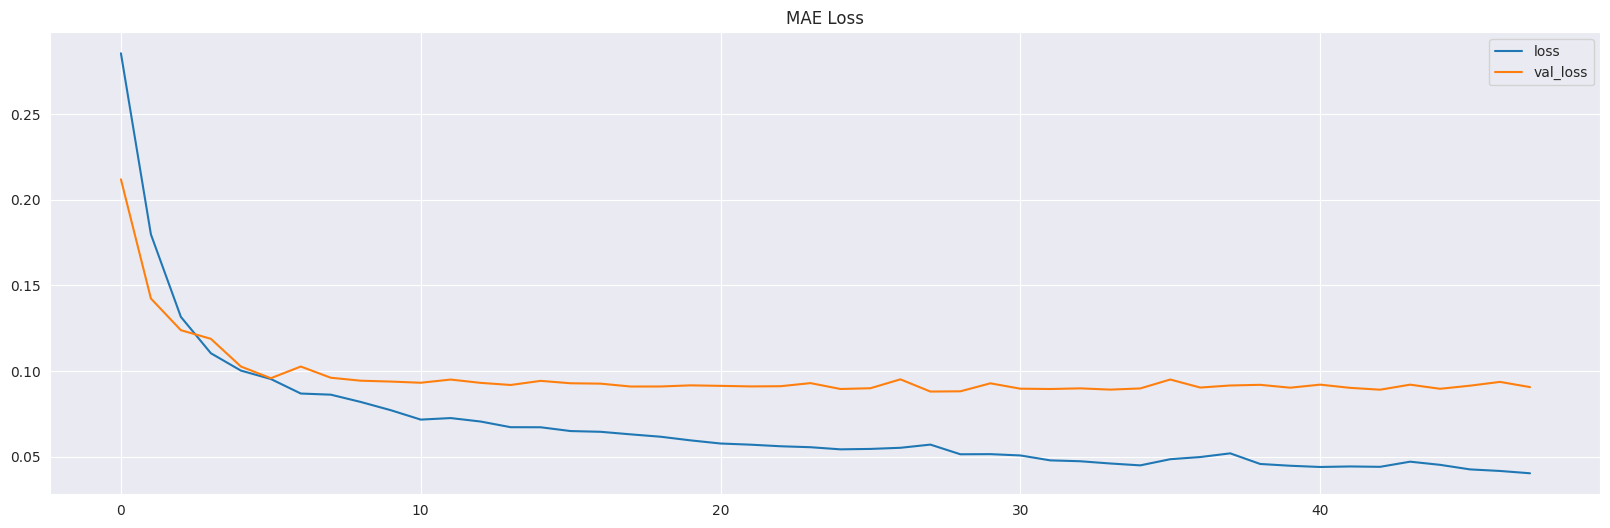

In [29]:
error.loc[:, ['loss','val_loss',]].plot(title="MAE Loss",figsize=(20,6));

# Prediction

In [30]:
pred_train = model.predict(X_train)
print('RMSE of train data:',np.sqrt(mean_squared_error(y_train,pred_train)))

12/12 [==============================] - 0s 7ms/step
RMSE of train data: 0.07445699058132707


In [32]:
pred_test  = model.predict(X_test)
print('RMSE of test data:',np.sqrt(mean_squared_error(y_test,pred_test)))


6/6 [==============================] - 0s 5ms/step
RMSE of test data: 0.11606249751844352


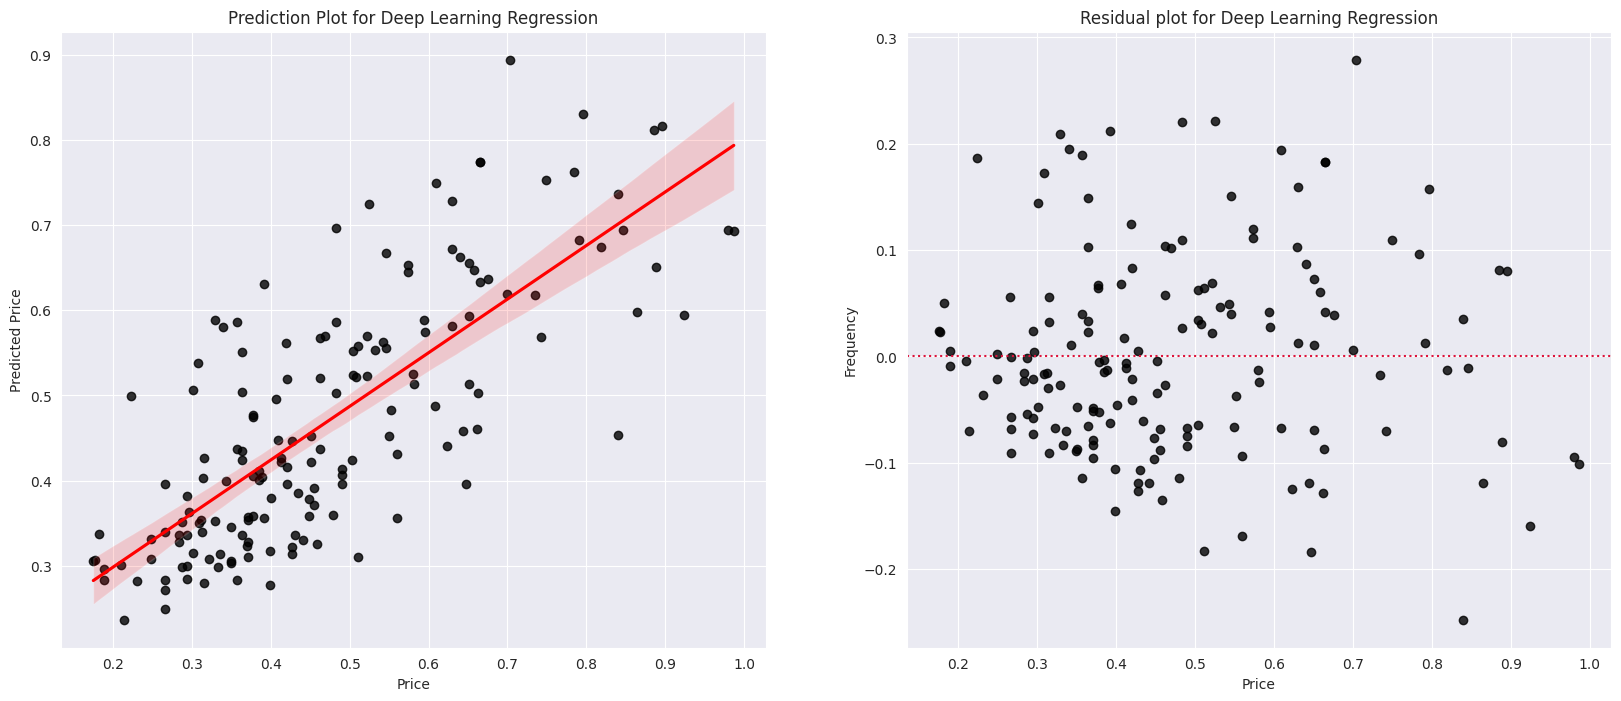

In [33]:
plt.figure(figsize=(20,8))
# Prediction plot
ax1 = plt.subplot(1,2,1)
sns.regplot(data=data,x=y_test,y=pred_test ,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Prediction Plot for Deep Learning Regression')
plt.xlabel('Price')
plt.ylabel('Predicted Price')

#Residual plot
ax2 = plt.subplot(1,2,2)
ax=sns.residplot(data= y,x=y_test,y=pred_test,color='black')
ax.lines[0].set_color('crimson')
plt.title('Residual plot for Deep Learning Regression')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

# Machine Learning Model

In [34]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [35]:
pred_train= LR.predict(X_train)
rmse_train_LR=np.sqrt(mean_squared_error(y_train,pred_train))
print('RMSE of train data',rmse_train_LR)

pred = LR.predict(X_test)
rmse_test_LR = np.sqrt(mean_squared_error(y_test,pred))
print('RMSE of test data',rmse_test_LR)


RMSE of train data 0.0946456467984725
RMSE of test data 0.10176367770802654


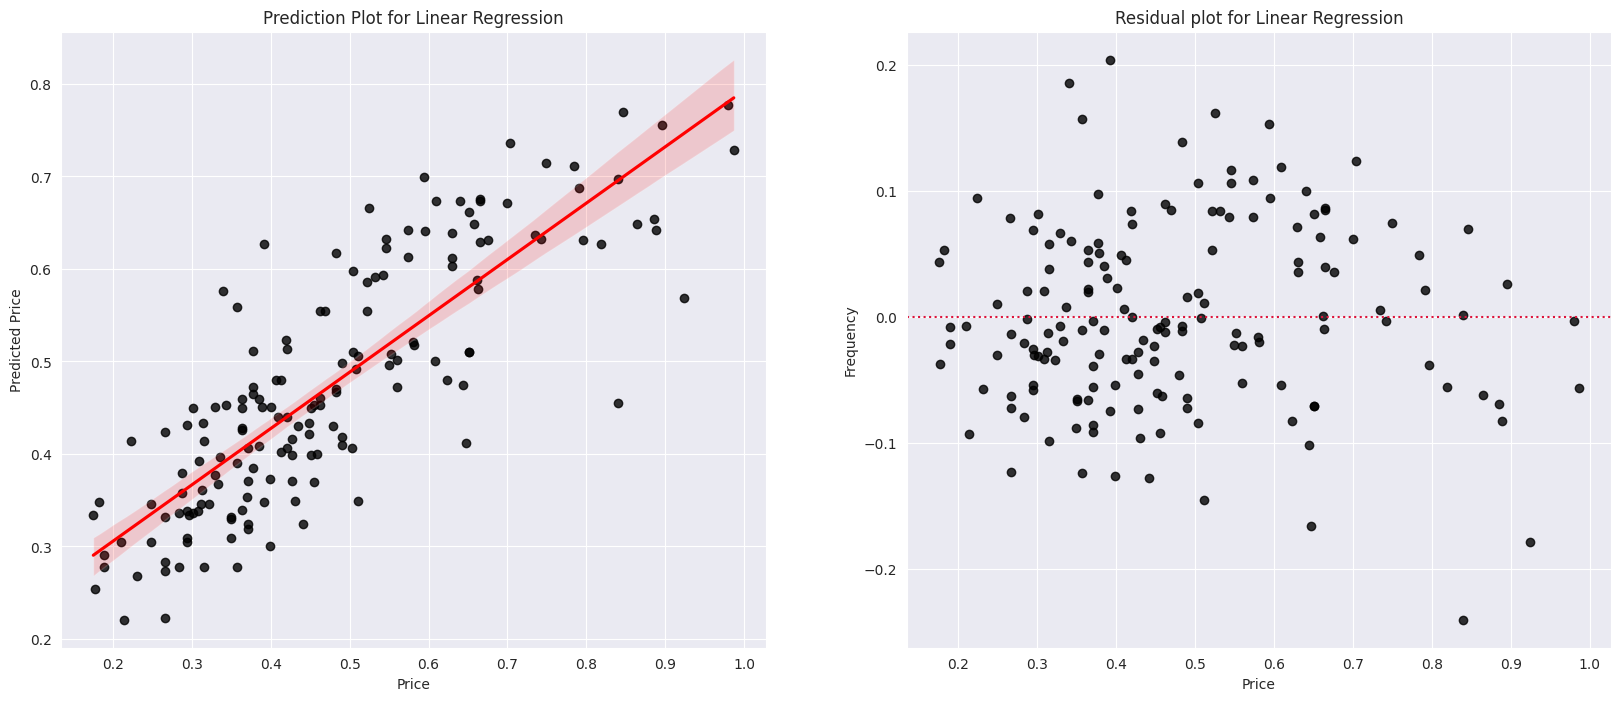

In [36]:
plt.figure(figsize=(20,8))
# Prediction plot
ax1 = plt.subplot(1,2,1)
sns.regplot(data=data,x=y_test,y=pred ,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Prediction Plot for Linear Regression')
plt.xlabel('Price')
plt.ylabel('Predicted Price')

#Residual plot
ax2 = plt.subplot(1,2,2)
ax=sns.residplot(data= y,x=y_test,y=pred,color='black')
ax.lines[0].set_color('crimson')
plt.title('Residual plot for Linear Regression')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

# Conclusion

Deep Learning model performs better than Linear Regression as RMSE of the deep learning model is smaller than the machine learning model.